<h1>Lab 3: ANOVA</h1>

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import random
import statsmodels.api as sma
import statsmodels as sm
import pylab as py
import scipy.stats as stats
import scipy as sp
import statsmodels.formula.api as smf
import sklearn
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from plotnine import *
from scipy.stats import skew
import statsmodels.stats.multicomp as mc

Use the garlic dataset to perform an ANOVA. This dataset has information on the weight of garlic bulbs (bulbwt) for 32 different garlic plants. Each garlic plant was initially treated with 1 of 4 different types of fertilizers. The purpose of the experiment is to determine whether or not there is any difference in the resulting bulb weight when a garlic plant is treated with a different fertilizer.

In [2]:
garlic = pd.read_csv("https://raw.githubusercontent.com/IAA-Faculty/statistical_foundations/refs/heads/master/garlic.csv")
garlic.head()

,BedID,Fertilizer,BulbWt
0,101,1,0.239164
1,102,1,0.258281
2,103,1,0.204786
3,104,1,0.243367
4,105,1,0.272639


Create a qq-plot for the overall bulbwt variable.

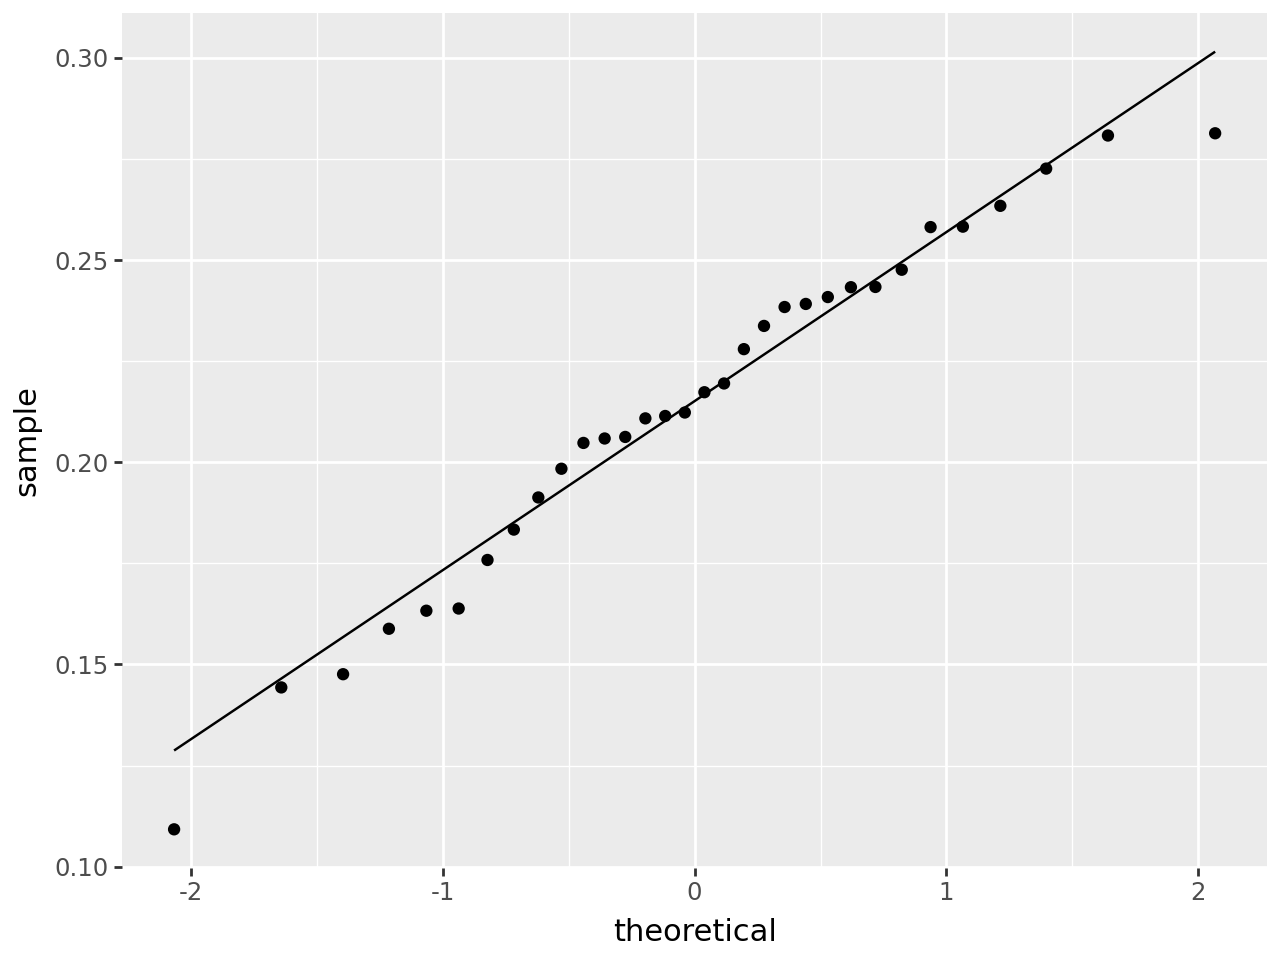

In [3]:
p = (
    ggplot(garlic, aes(sample="BulbWt")) +
    stat_qq() +
    stat_qq_line()
    )

p.show()

Create qq-plots for each group.

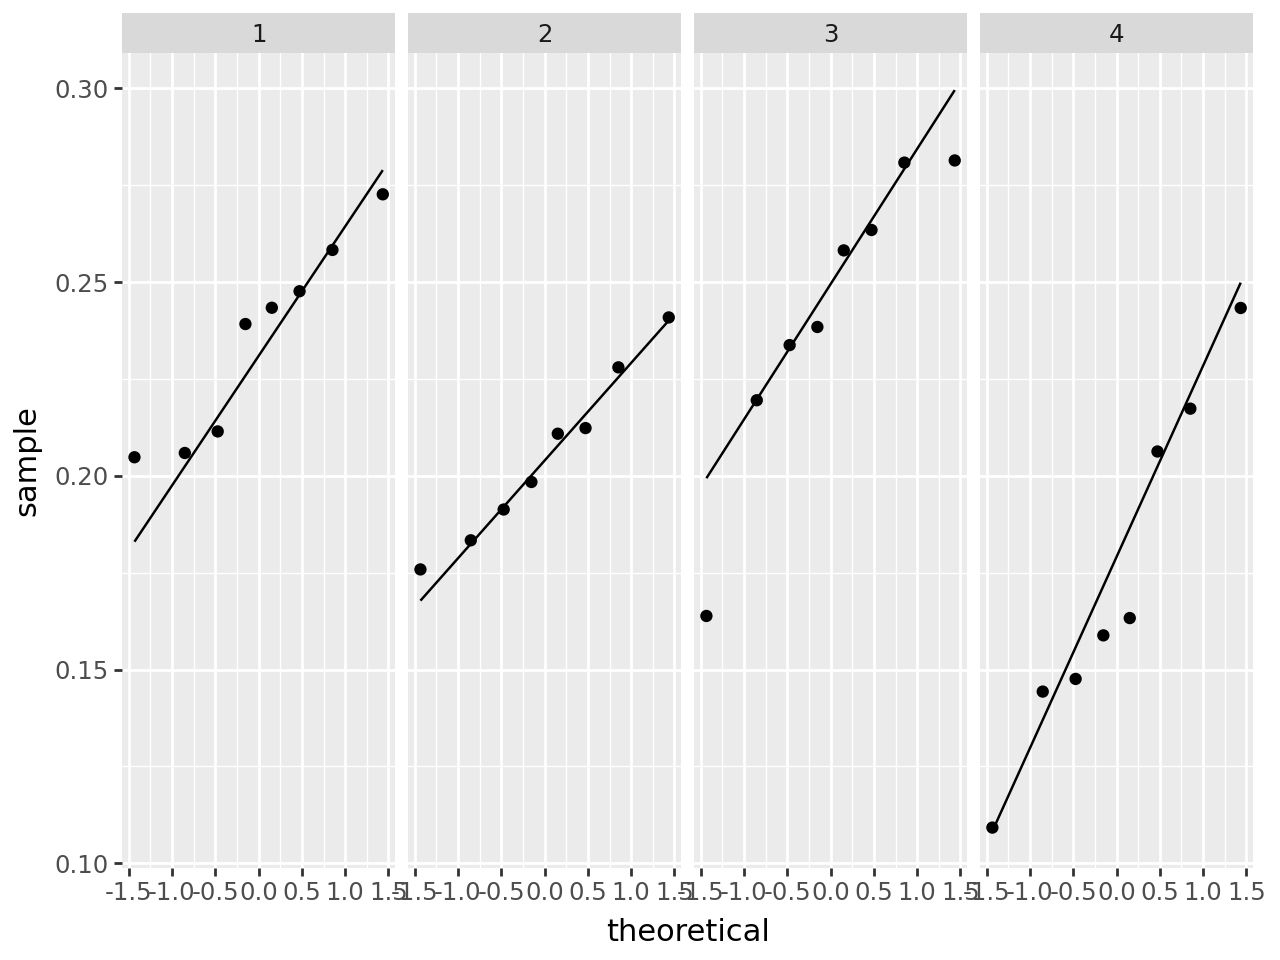

In [8]:
p = (
    ggplot(garlic, aes(sample='BulbWt')) +
    stat_qq() +
    stat_qq_line() +
    facet_grid('~Fertilizer')
    )

p.show()

Perform Levene test to check the assumption of equal variance (homoscedasticity). What is your p-value? (round to 4 decimal places)

In [12]:
f1 = garlic[garlic['Fertilizer']==1]['BulbWt']
f2 = garlic[garlic['Fertilizer']==2]['BulbWt']
f3 = garlic[garlic['Fertilizer']==3]['BulbWt']
f4 = garlic[garlic['Fertilizer']==4]['BulbWt']

l_test = sp.stats.levene(f1, f2, f3, f4)
print(l_test)

LeveneResult(statistic=0.9663375499952352, pvalue=0.4224001612313776)


Which fertilizers are statistically different from each other?

In [15]:
comp = mc.MultiComparison(garlic['BulbWt'], garlic['Fertilizer'])
ph_res = comp.tukeyhsd(alpha = 0.05)
ph_res.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
1,2,-0.0303,0.3021,-0.0766,0.0161,False
1,3,0.007,0.9758,-0.0394,0.0534,False
1,4,-0.0616,0.0058,-0.108,-0.0153,True
2,3,0.0373,0.149,-0.0091,0.0837,False
2,4,-0.0313,0.2738,-0.0777,0.015,False
3,4,-0.0686,0.002,-0.115,-0.0223,True


The Bottle dataset contains observations from a factory that is producing plastic water bottles along 3 different assembly lines. The number of units produced by each assembly line are given for a number of days. The manufacturer wants to know if the assembly lines are producing the same number of bottles. He suspects that 2 of his lines are significantly better than the third, but he has trouble demonstrating this due to variability in production. We will use this dataset to determine if we can answer his question with the tools we have now.

In [17]:
bottle = pd.read_csv("https://raw.githubusercontent.com/IAA-Faculty/statistical_foundations/refs/heads/master/bottle.csv")
bottle.head()

,Units,Line
0,37,1
1,22,1
2,26,1
3,35,1
4,27,1


Is the data normally distributed?



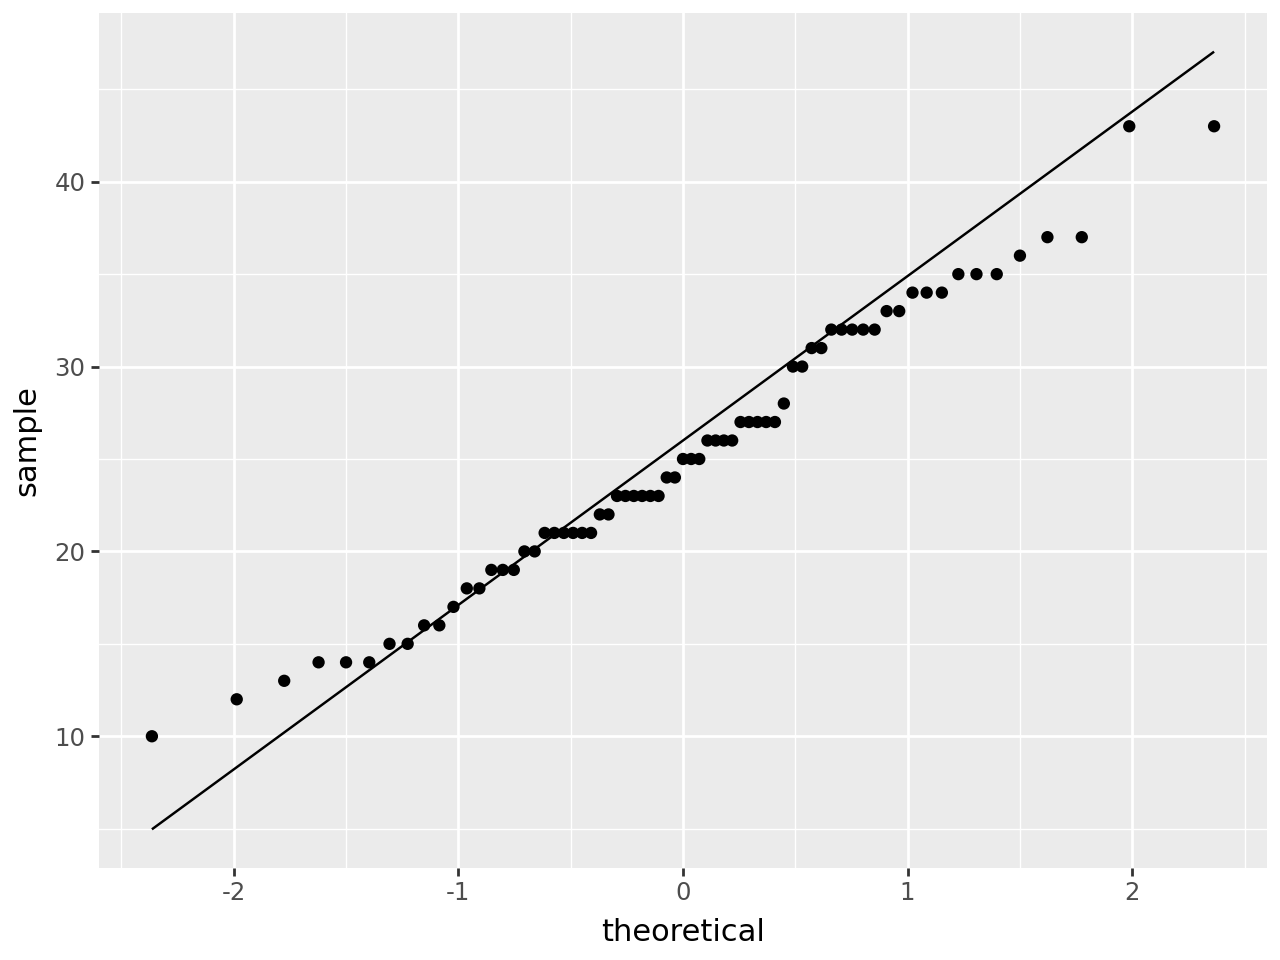

In [19]:
p = (
    ggplot(bottle, aes(sample="Units")) +
    stat_qq() +
    stat_qq_line()
    )

p.show()

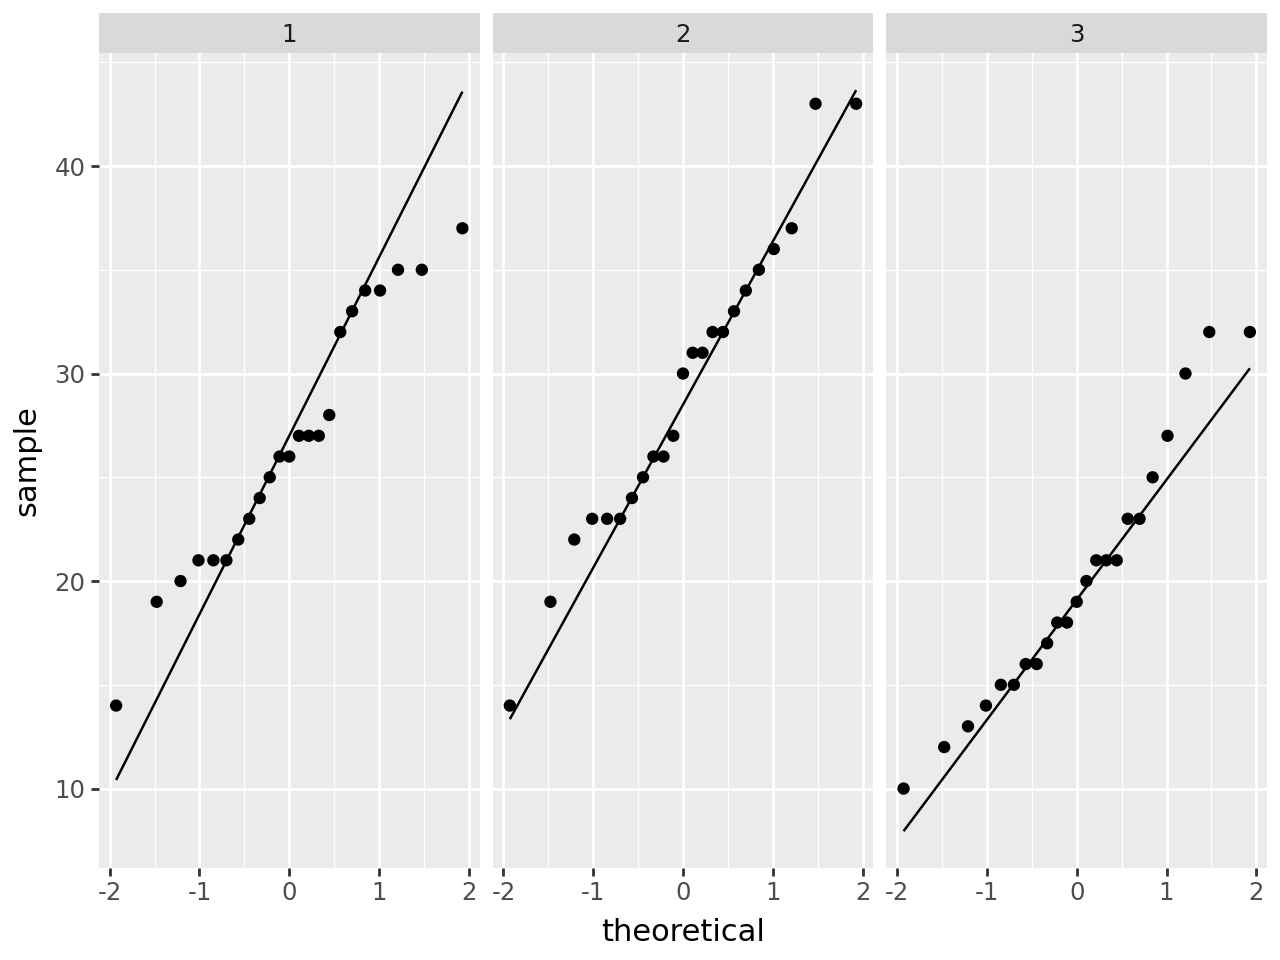

In [27]:
p = (
    ggplot(bottle, aes(sample="Units")) +
    stat_qq() +
    stat_qq_line() +
    facet_grid("~Line")
    )

p.show()

Perform Levene test to check the assumption of equal variance (homoscedasticity). What is your p-value? (round to 4 decimal places)

In [21]:
l1 = bottle[bottle['Line']==1]['Units']
l2 = bottle[bottle['Line']==2]['Units']
l3 = bottle[bottle['Line']==3]['Units']

l_test2 = sp.stats.levene(l1, l2, l3)
print(l_test2)


LeveneResult(statistic=0.5204553539665604, pvalue=0.5966683462816277)


Perform the correct pairwise test and report if group 3 is significantly different from lines 1 and/or 2

In [23]:
comp1 = mc.MultiComparison(bottle['Units'], bottle['Line'])
ph_res1 = comp1.tukeyhsd(alpha = 0.05)
ph_res1.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
1,2,2.5217,0.3951,-2.0961,7.1396,False
1,3,-6.6522,0.0028,-11.27,-2.0344,True
2,3,-9.1739,0.0,-13.7917,-4.5561,True


The Trials dataset contains information from a clinical trial for blood pressure medicine. There are 2 different drugs being compared to a placebo, one of which is already FDA approved. The study aims to confirm that the new drug (treatment = New Drug) is effective at lowering blood pressure when compared to the placebo. (This will be revisited in lab 4 for post-hoc analysis)

In [3]:
trials = pd.read_csv("https://raw.githubusercontent.com/IAA-Faculty/statistical_foundations/refs/heads/master/trials.csv")

trials.head()

,Treatment,Subject,Age,BaselineBP,BPChange
0,New Drug,N1,68,100.3,-20.4
1,New Drug,N2,59,91.6,-5.7
2,New Drug,N3,60,90.0,-4.3
3,New Drug,N4,57,93.7,-7.9
4,New Drug,N5,58,95.4,-10.1


Is the data normally distributed?



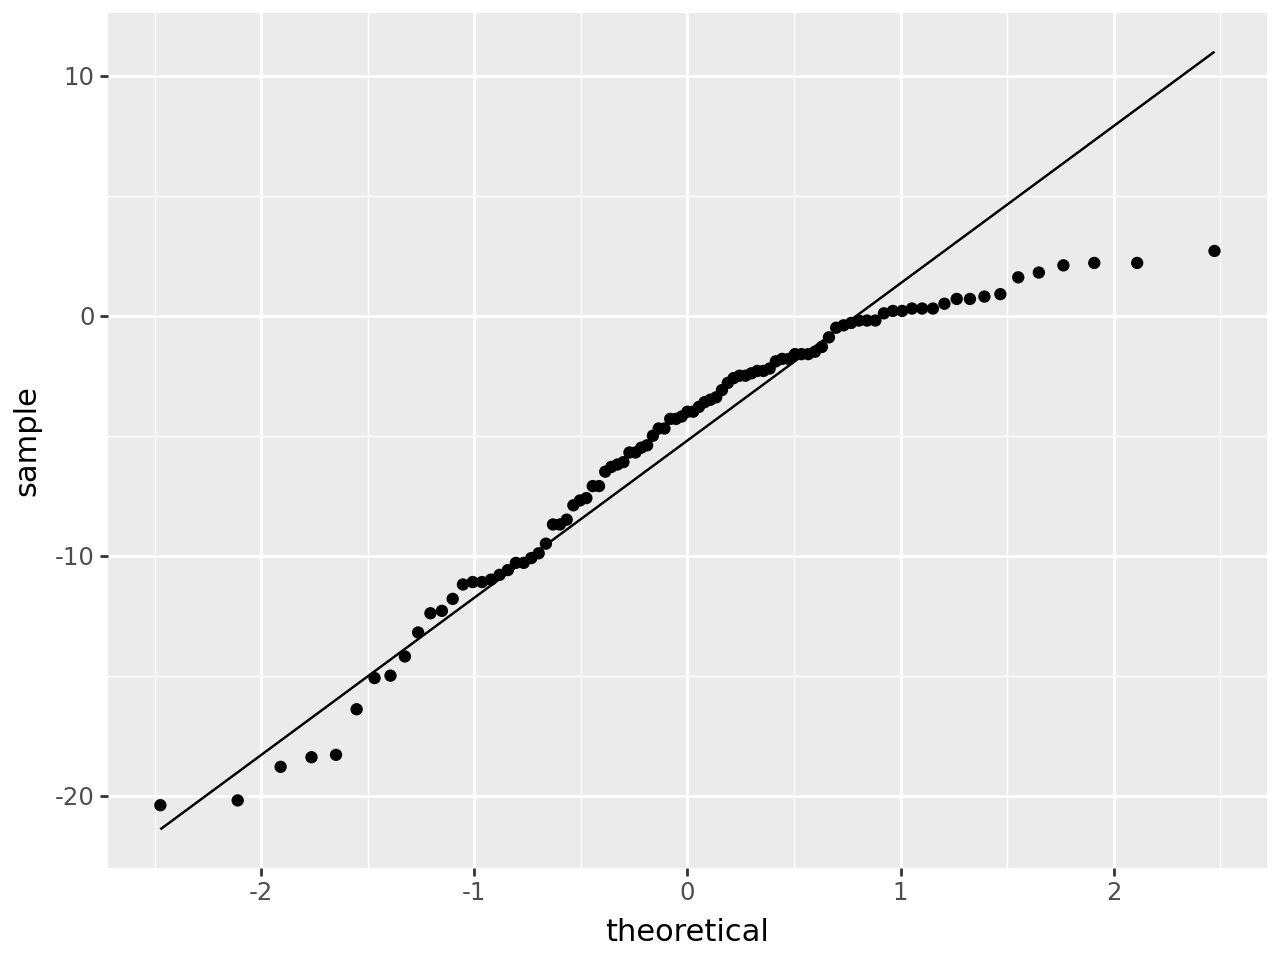

In [25]:
p = (
    ggplot(trials, aes(sample="BPChange")) +
    stat_qq() +
    stat_qq_line()
    )

p.show()

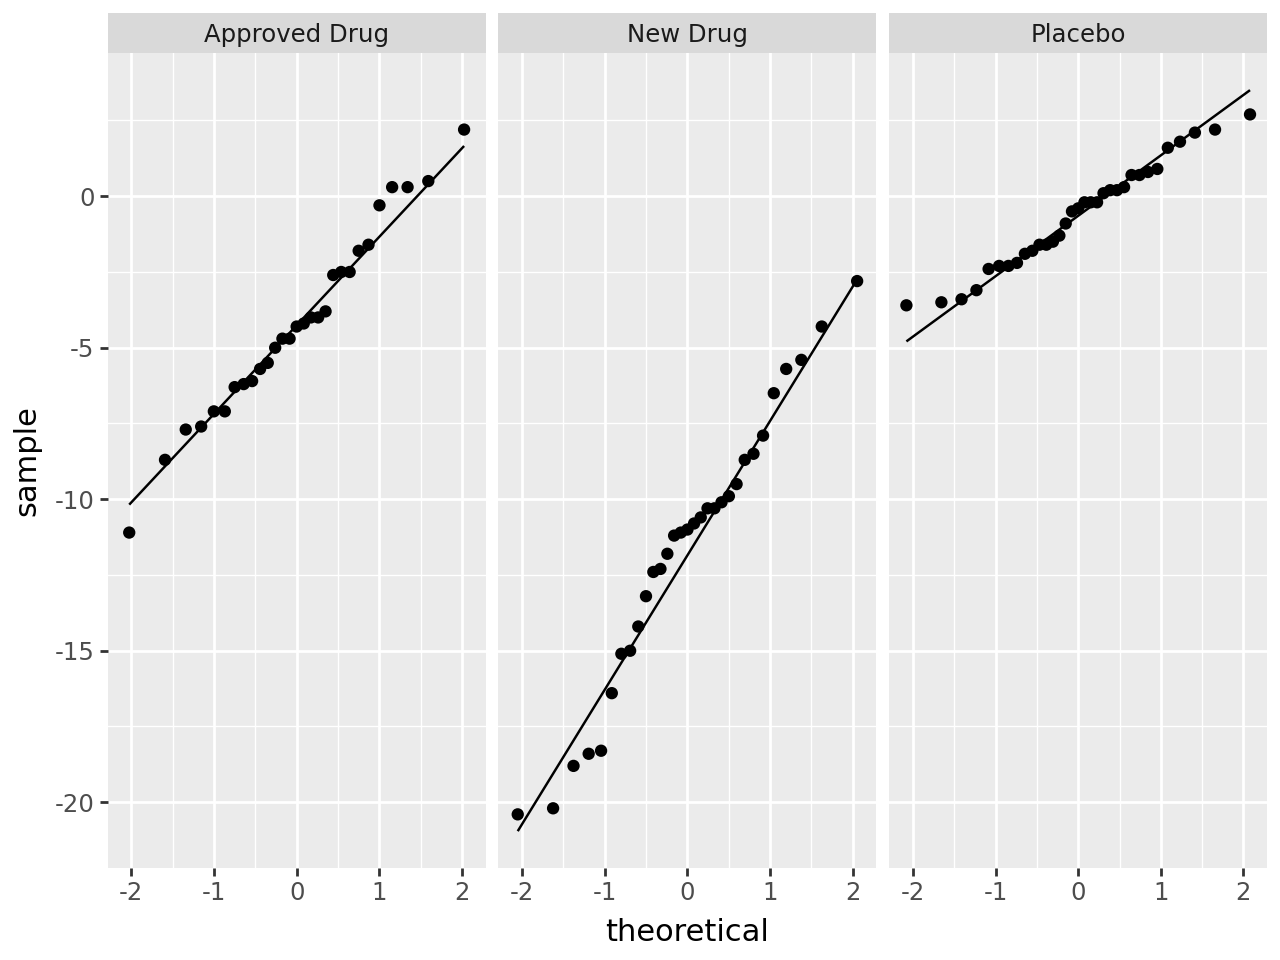

In [4]:
p = (
    ggplot(trials, aes(sample="BPChange")) +
    stat_qq() +
    stat_qq_line() +
    facet_grid("~Treatment")
    )

p.show()

Perform Levene test to check the assumption of equal variance (homoscedasticity). What is your p-value? (round to 4 decimal places)

In [5]:
new = trials[trials['Treatment']=="New Drug"]['BPChange']
placebo = trials[trials['Treatment']== "Placebo"]['BPChange']
approved = trials[trials['Treatment']=="Approved Drug"]['BPChange']


l_test2 = sp.stats.levene(new,placebo,approved)
print(l_test2)

LeveneResult(statistic=7.414592925011916, pvalue=0.0010452335586602613)
